# Задание 4

In [1]:
%matplotlib inline

import random
import math
from itertools import islice
from typing import Generator, Tuple, List

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import pandas as pd


sns.set(style='whitegrid')

## Упражнение 1.

Составить программу для моделирования случайных точек равномерно распределенных на поверхности сферы радиуса R (использовать сферические координаты).

In [2]:
def sphere_points_generator(radius: float = 1.0) -> Generator[Tuple[float, float, float], None, None]:
    while True:
        phi = 2 * math.pi * random.random()
        theta = math.acos(1 - 2 * random.random())
        yield (
            radius * math.sin(theta) * math.cos(phi),
            radius * math.sin(theta) * math.sin(phi),
            radius * math.cos(theta),
        )


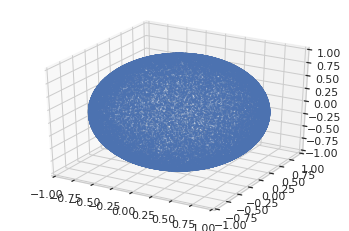

In [4]:
n_points = 10 ** 5

points = list(islice(sphere_points_generator(), n_points))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=[p[0] for p in points], ys=[p[1] for p in points], zs=[p[2] for p in points], s=0.1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

## Упражнение 2

Вычислить момент инерции шара массой М и радиусом R со сферической полостью радиусом r<R, центр которой смещен относительно центра шара на величину d<R/2. 


In [13]:
radius = 1.0

d = radius / 3
radius_hole = radius / 3
mass = 10

density = 3 * mass / (4 * math.pi * (radius ** 3 - radius_hole ** 3))


In [26]:
def uniform_generator_3d(a: float, b: float, c: float) -> Generator[Tuple[float, float, float], None, None]:
    while True:
        yield (
            a * (2 * random.random() - 1),
            b * (2 * random.random() - 1),
            c * (2 * random.random() - 1)
        )

In [33]:
def density_func(p: Tuple[float, float, float]) -> float:
    if (p[0] - d) ** 2 + p[1] ** 2 + p[2] ** 2 > radius_hole ** 2 and \
            p[0] ** 2 + p[1] ** 2 + p[2] ** 2 < radius ** 2:
        return density * (p[0] ** 2 + p[1] ** 2)
    else:
        return 0

In [36]:
n_points = 10 ** 6

inertia_momentum = (
        8 * radius ** 3 *
        sum(map(density_func, islice(uniform_generator_3d(radius, radius, radius), n_points))) /
        n_points
)
inertia_momentum


4.093319224597313